In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('C:/Users/GOWRICH1/Downloads/Data_Ethics/Non-news data/Dataethics_Non_news_audience_entities.xlsx') 
data = data.replace(np.nan,'')

In [3]:
sentences = data['Message_clean'].tolist()

In [4]:
from sentence_transformers import SentenceTransformer
model_bert = SentenceTransformer('bert-base-nli-max-tokens')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/397 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
embedding_bert = np.array(model_bert.encode(sentences, show_progress_bar=True))
#Bert embeddings are shape of 768
print("Bert Embedding shape", embedding_bert.shape)
print("Bert Embedding sample", embedding_bert[0][0:50])

Batches:   0%|          | 0/2781 [00:00<?, ?it/s]

Bert Embedding shape (88965, 768)
Bert Embedding sample [ 0.050804    1.3532349   1.6455848   0.3155872   1.0674682  -0.47722286
  1.0104953   1.0903643   0.888268    0.32009983  1.4401618   1.127143
  1.1569571   1.0002987   0.20553365  0.8037896   1.1432763   0.25870886
  1.4261309   1.051163    0.09885907  0.02759485  1.7702212   0.28844967
  1.3743807   1.1926016   0.1871303   1.5283799  -0.06272628  0.46122485
  0.29629     0.60270894  0.00528686  1.0065694   0.7661866   1.1455402
  1.033743    0.7372973   0.04727744  0.01088135  0.59642094  0.43985036
  0.04406863  1.041516    0.57485086  0.60233176 -0.19615081  0.9397049
  0.67141175  1.0591697 ]


In [7]:
from sklearn.cluster import KMeans

def predict_topics_with_kmeans(embeddings,num_topics):
    kmeans_model = KMeans(num_topics)
    kmeans_model.fit(embeddings)
    topics_labels = kmeans_model.predict(embeddings)
    return topics_labels

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [9]:
#Apply Kmeans without dimension reduction
labels_bert_raw  = predict_topics_with_kmeans(embedding_bert,30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

In [26]:
labels_bert_raw

array([22, 20, 17, ..., 10,  3,  3])

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
def plot_embeddings(embedding, labels,title):

    labels = np.array( labels )
    distinct_labels =  set( labels )
    
    n = len(embedding)
    counter = Counter(labels)
    for i in range(len( distinct_labels )):
        ratio = (counter[i] / n )* 100
        cluster_label = f"cluster {i}: { round(ratio,2)}"
        x = embedding[:, 0][labels == i]
        y = embedding[:, 1][labels == i]
        plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
    plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
    plt.title(title)

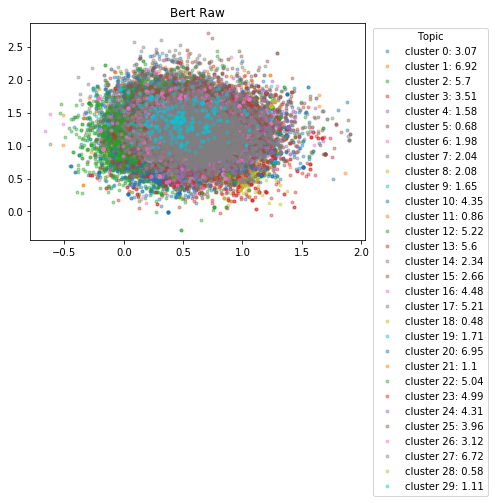

In [22]:
plot_embeddings(embedding_bert, labels_bert_raw,"Bert Raw")

In [14]:
sentence = data['Message'].tolist()

In [17]:
sentence

[" @cake_goblin I had the chills for a few hours last night and nausea (it felt like morning sickness). Now I'm just tired and a bit sore. Would prefer this over COVID. I hope your dad is okay? I am allergic to another medication so the Dr made me wait for 30 mins to be sure I was okay.",
 '(CNN) President Joe Biden has launched a new, more aggressive campaign to vaccinate Americans against Covid-19, headlined by a new requirement that all employees of the federal government -- the country\'s largest workforce -- either get the shot or face the prospect of an onerous mitigation regimen. The decision by the White House, in the works for several days and announced by Biden late on Thursday afternoon, comes as the Delta variant fuels another wave of infections and, among the unvaccinated, rising hospitalizations and deaths. The severity of the variant was underscored later Thursday with reports of an internal document from the US Centers for Disease Control and Prevention outlining unpubl